In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
##İlk casede hareketsiz kamera ve küp

In [2]:
df = pd.read_csv('DistanceLogTEST1YENİ.csv')



In [3]:
df.head()

,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
0,3.47,0.0,1.5,1.5,-0.0007,1.4995,-0.0005,1.5005,0.0000,1.5005
1,3.58,0.0,1.5,1.5,-0.0008,1.4995,-0.0004,1.5004,-0.0001,1.5005
2,3.68,0.0,1.5,1.5,-0.0008,1.4994,-0.0005,1.5005,0.0000,1.5005
3,3.78,0.0,1.5,1.5,-0.0008,1.4994,-0.0005,1.5005,0.0000,1.5005
4,3.90,0.0,1.5,1.5,-0.0008,1.4993,-0.0003,1.5003,-0.0001,1.5005


In [4]:
df.describe()


,Time,ObjectX,ObjectY,ObjectZ,CameraX,CameraY,CameraZ,Distance,DeltaDistance,InitialDistance
count,908.000000,908.0,908.0,908.0,908.000000,908.000000,907.000000,907.000000,907.000000,9.070000e+02
mean,54.157698,0.0,1.5,1.5,-0.001319,1.499533,0.000451,1.499551,-0.000927,1.500500e+00
std,29.438670,0.0,0.0,0.0,0.000734,0.000861,0.000659,0.000659,0.000659,2.221671e-16
min,3.470000,0.0,1.5,1.5,-0.002700,1.498200,-0.000900,1.497100,-0.003400,1.500500e+00
25%,28.105000,0.0,1.5,1.5,-0.001900,1.499000,-0.000100,1.499000,-0.001400,1.500500e+00
50%,55.000000,0.0,1.5,1.5,-0.001400,1.499200,0.000300,1.499700,-0.000800,1.500500e+00
75%,79.625000,0.0,1.5,1.5,-0.000800,1.500200,0.001000,1.500100,-0.000400,1.500500e+00
max,104.470000,0.0,1.5,1.5,0.000800,1.502000,0.002900,1.500900,0.000400,1.500500e+00


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             908 non-null    float64
 1   ObjectX          908 non-null    float64
 2   ObjectY          908 non-null    float64
 3   ObjectZ          908 non-null    float64
 4   CameraX          908 non-null    float64
 5   CameraY          908 non-null    float64
 6   CameraZ          907 non-null    float64
 7   Distance         907 non-null    float64
 8   DeltaDistance    907 non-null    float64
 9   InitialDistance  907 non-null    float64
dtypes: float64(10)
memory usage: 71.1 KB


In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Açıları hesapladıktan sonra tutulacak liste
angles = []

def angle_between(v1,v2):
    v1_norm = v1 / np.linalg.norm(v1)
    v2_norm = v2 / np.linalg.norm(v2)
    dot = np.dot(v1_norm, v2_norm)
    dot = np.clip(dot, -1.0, 1.0)  # Güvenli arccos için
    angle_rad = np.arccos(dot)
    return np.degrees(angle_rad)

for _, row in df.iterrows():
    v1 = np.array([row["ObjectX"], row["ObjectY"], row["ObjectZ"]])
    v2 = np.array([row["CameraX"], row["CameraY"], row["CameraZ"]])
    angle = angle_between(v1,v2)
    angles.append(angle)
df["AngleBetweenVectors"] = angles

In [8]:
df.to_csv("veri_with_angles.csv", index=False)#Yeni dosya 

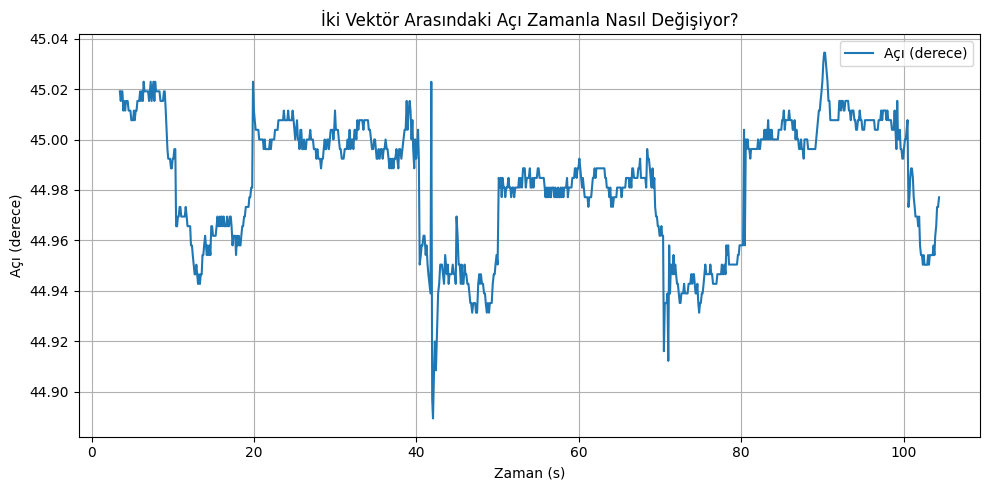

In [9]:
# Görselleştir
plt.figure(figsize=(10, 5))
plt.plot(df["Time"], df["AngleBetweenVectors"], label="Açı (derece)")
plt.xlabel("Zaman (s)")
plt.ylabel("Açı (derece)")
plt.title("İki Vektör Arasındaki Açı Zamanla Nasıl Değişiyor?")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

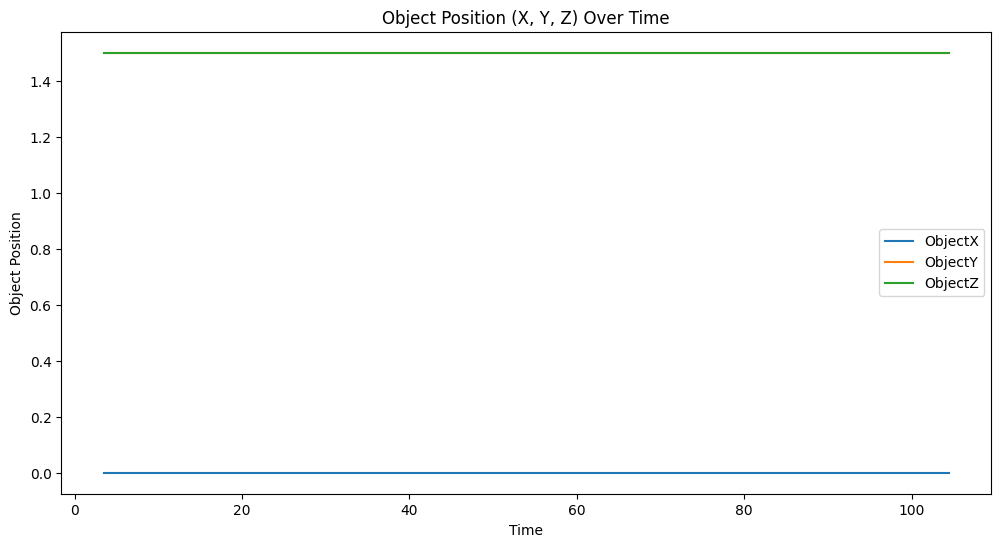

In [10]:
##OBJENİN KONUMU
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='ObjectX', data=df, label='ObjectX')
sns.lineplot(x='Time', y='ObjectY', data=df, label='ObjectY')
sns.lineplot(x='Time', y='ObjectZ', data=df, label='ObjectZ')
plt.xlabel('Time')
plt.ylabel('Object Position')
plt.title('Object Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

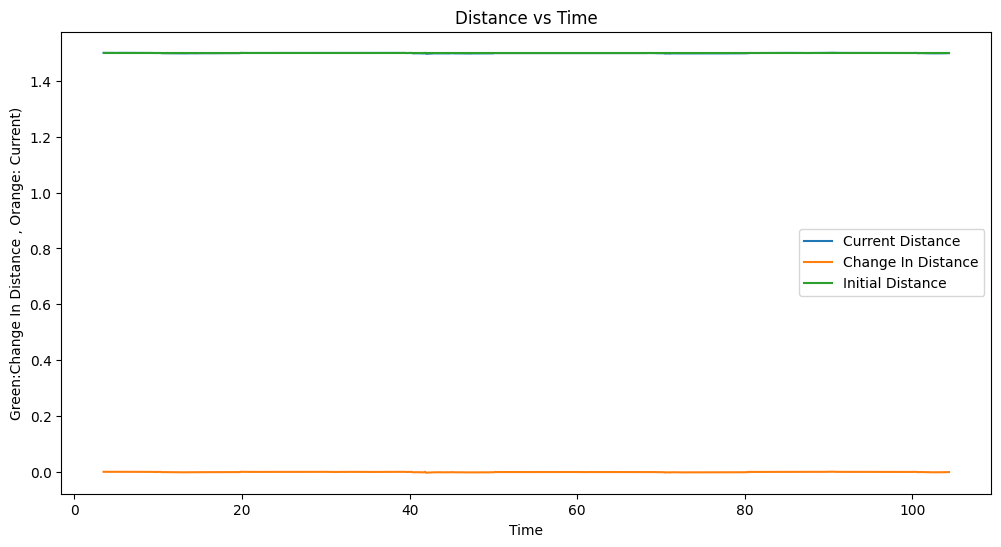

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='Distance', data=df,label='Current Distance')
sns.lineplot(x='Time', y='DeltaDistance', data=df,label='Change In Distance')
sns.lineplot(x='Time', y='InitialDistance', data=df,label='Initial Distance')
plt.xlabel('Time')
plt.ylabel('Green:Change In Distance , Orange: Current)')
plt.title('Distance vs Time')
plt.legend()
plt.show()






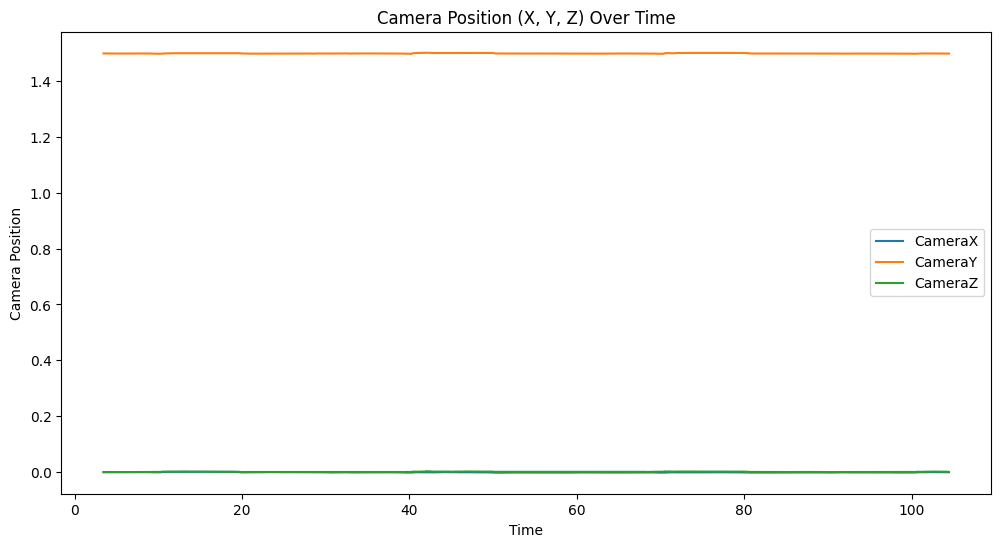

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX')
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY')
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ')
plt.xlabel('Time')
plt.ylabel('Camera Position')
plt.title('Camera Position (X, Y, Z) Over Time')
plt.legend()
plt.show()

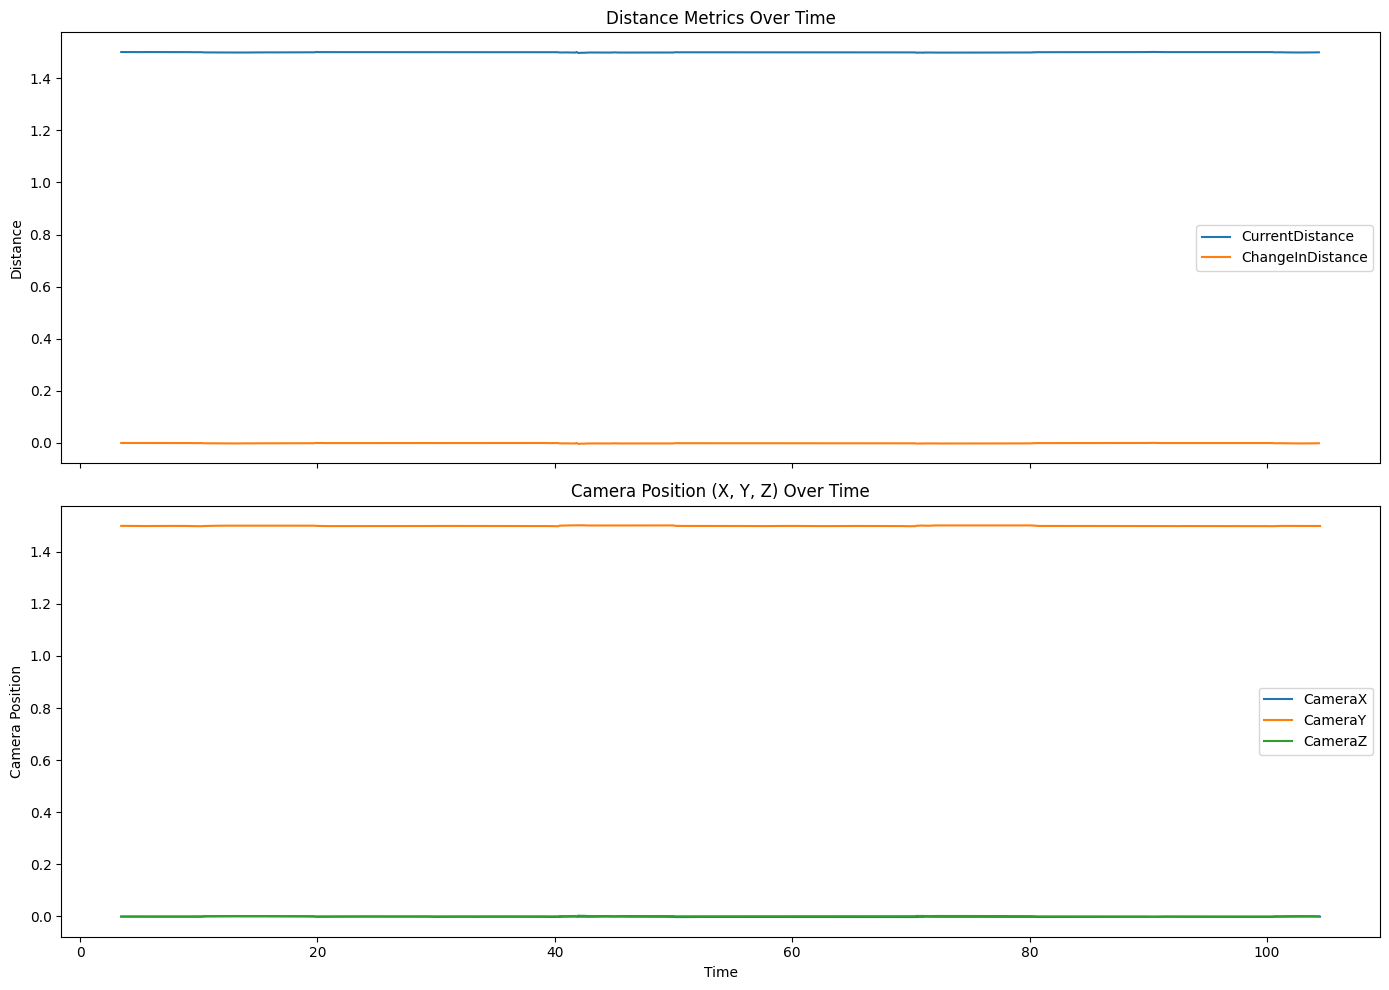

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# First plot: Distances

sns.lineplot(x='Time', y='Distance', data=df, label='CurrentDistance', ax=axs[0])
sns.lineplot(x='Time', y='DeltaDistance', data=df, label='ChangeInDistance', ax=axs[0])
axs[0].set_ylabel('Distance')
axs[0].set_title('Distance Metrics Over Time')
axs[0].legend()

# Second plot: Camera positions
sns.lineplot(x='Time', y='CameraX', data=df, label='CameraX', ax=axs[1])
sns.lineplot(x='Time', y='CameraY', data=df, label='CameraY', ax=axs[1])
sns.lineplot(x='Time', y='CameraZ', data=df, label='CameraZ', ax=axs[1])
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Camera Position')
axs[1].set_title('Camera Position (X, Y, Z) Over Time')
axs[1].legend()

plt.tight_layout()
plt.show()